In [1]:
### Data Collection
import pandas_datareader as pdr
#key="60cbcc7406b384b442e972f4ce75433e9742e244"

In [2]:
#df = pdr.get_data_tiingo('GOOG', api_key=key)

In [3]:
#df.to_csv('GOOG.csv')

###Importing Dataset

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('GOOG.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3654400
1,2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000
2,2016-11-16,755.200012,766.359985,750.510010,764.479980,764.479980,1472600
3,2016-11-17,766.919983,772.700012,764.229980,771.229980,771.229980,1304000
4,2016-11-18,771.369995,775.000000,760.000000,760.539978,760.539978,1547100


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3654400
1,2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000
2,2016-11-16,755.200012,766.359985,750.510010,764.479980,764.479980,1472600
3,2016-11-17,766.919983,772.700012,764.229980,771.229980,771.229980,1304000
4,2016-11-18,771.369995,775.000000,760.000000,760.539978,760.539978,1547100
...,...,...,...,...,...,...,...
1253,2021-11-05,2987.070068,3011.415039,2973.040039,2984.820068,2984.820068,1019700
1254,2021-11-08,3000.000000,3020.689941,2982.399902,2987.030029,2987.030029,919400
1255,2021-11-09,2994.919922,3007.570068,2950.139893,2984.969971,2984.969971,843800
1256,2021-11-10,2960.195068,2974.000000,2906.500000,2932.520020,2932.520020,1135400


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3654400
1,2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000
2,2016-11-16,755.200012,766.359985,750.510010,764.479980,764.479980,1472600
3,2016-11-17,766.919983,772.700012,764.229980,771.229980,771.229980,1304000
4,2016-11-18,771.369995,775.000000,760.000000,760.539978,760.539978,1547100


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0        736.080017
1        758.489990
2        764.479980
3        771.229980
4        760.539978
           ...     
1253    2984.820068
1254    2987.030029
1255    2984.969971
1256    2932.520020
1257    2934.959961
Name: Close, Length: 1258, dtype: float64

###Plot

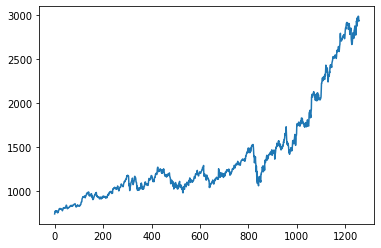

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [13]:
import numpy as np

In [14]:
df1

0        736.080017
1        758.489990
2        764.479980
3        771.229980
4        760.539978
           ...     
1253    2984.820068
1254    2987.030029
1255    2984.969971
1256    2932.520020
1257    2934.959961
Name: Close, Length: 1258, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.        ]
 [0.00995578]
 [0.01261688]
 ...
 [0.99908481]
 [0.97578355]
 [0.97686751]]


###splitting dataset into train and test split

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
train_data

array([[0.        ],
       [0.00995578],
       [0.01261688],
       [0.01561561],
       [0.01086651],
       [0.01471379],
       [0.01430063],
       [0.01106643],
       [0.01137297],
       [0.01428729],
       [0.01544237],
       [0.00975586],
       [0.00525999],
       [0.00640618],
       [0.01174615],
       [0.01023122],
       [0.01559785],
       [0.01792131],
       [0.02363889],
       [0.02363002],
       [0.02666428],
       [0.02709522],
       [0.02744173],
       [0.02430972],
       [0.02582021],
       [0.02680644],
       [0.02598013],
       [0.02451409],
       [0.02391433],
       [0.02464292],
       [0.02175525],
       [0.02075122],
       [0.01587774],
       [0.0222395 ],
       [0.02257714],
       [0.02574024],
       [0.03112908],
       [0.03135121],
       [0.03052487],
       [0.03191095],
       [0.03122236],
       [0.03189764],
       [0.03044491],
       [0.03109353],
       [0.02936314],
       [0.03062707],
       [0.03697549],
       [0.039

###convert an array of values into a dataset matrix

In [20]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50))
model.add(Dense(1,))

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1),))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1,))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 293ms/step - loss: 0.0084 - val_loss: 0.1240
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0020 - val_loss: 0.0456
Epoch 3/100
12/12 [==============================] - 2s 177ms/step - loss: 9.6879e-04 - val_loss: 0.0407
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 5.4446e-04 - val_loss: 0.0125
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 3.7080e-04 - val_loss: 0.0013
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 3.2409e-04 - val_loss: 0.0021
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 3.1577e-04 - val_loss: 0.0014
Epoch 8/100
12/12 [==============================] - 2s 179ms/step - loss: 3.0188e-04 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 2s 177ms/step - loss: 2.9687e-04 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 2s 176ms/

In [31]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [32]:
### The prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1128.9766285698786

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2431.0288711771304

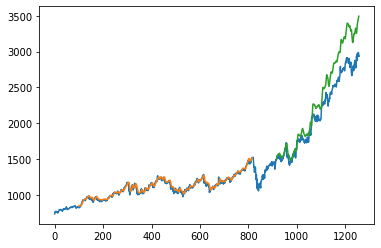

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.796619184540114,
 0.8039094010764731,
 0.8013593706584721,
 0.7998000250571535,
 0.7926831295620973,
 0.7864412988128142,
 0.7957929276307716,
 0.8166773389901472,
 0.8260245207968662,
 0.828747871811913,
 0.8207468011955124,
 0.824278621519206,
 0.833070482242233,
 0.8368954734477685,
 0.8465625068709879,
 0.8393123129915157,
 0.844456733764197,
 0.8214309740966383,
 0.8378462435619827,
 0.8511650559923674,
 0.8576334617421082,
 0.8975055155511822,
 0.9137519114307191,
 0.8884470576150671,
 0.8847597038507666,
 0.8861725188768874,
 0.8744485192947946,
 0.8812767993179229,
 0.8838579579260777,
 0.8816233325575957,
 0.8897221268012769,
 0.890575065333792,
 0.8991581382128,
 0.8999977361558573,
 0.896381532794341,
 0.9026011289316895,
 0.90274776834982,
 0.9072791666241586,
 0.8929252014859936,
 0.8864345606800619,
 0.8894866577783425,
 0.9030231511867088,
 0.9266798293519811,
 0.9382216143145519,
 0.9431217804404979,
 0.9357737545350695,
 0.9573424471942471,
 0.9655078364307985,
 0.9

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.2188859]
101
1 day input [0.8039094  0.80135937 0.79980003 0.79268313 0.7864413  0.79579293
 0.81667734 0.82602452 0.82874787 0.8207468  0.82427862 0.83307048
 0.83689547 0.84656251 0.83931231 0.84445673 0.82143097 0.83784624
 0.85116506 0.85763346 0.89750552 0.91375191 0.88844706 0.8847597
 0.88617252 0.87444852 0.8812768  0.88385796 0.88162333 0.88972213
 0.89057507 0.89915814 0.89999774 0.89638153 0.90260113 0.90274777
 0.90727917 0.8929252  0.88643456 0.88948666 0.90302315 0.92667983
 0.93822161 0.94312178 0.93577375 0.95734245 0.96550784 0.96544124
 0.96881764 0.95439697 0.95933716 0.96594765 0.96030116 0.96056776
 0.93397894 0.94769765 0.94717346 0.9631667  0.95576976 0.92991403
 0.90817657 0.9137697  0.92524934 0.93313934 0.94030515 0.93024723
 0.88300491 0.86822892 0.85707369 0.88547945 0.86151182 0.88294276
 0.89340059 0.90967366 0.91740824 0.90667048 0.88770518 0.89825184
 0.92945643 0.93179323 0.94321506 0.95086959 0.93836825 0.9416158
 0.90469356 0.90600854 0.91399627 0.

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1258

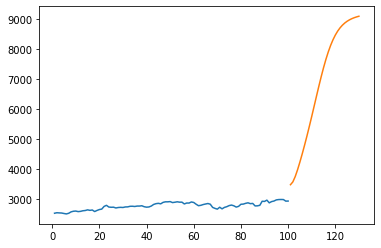

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

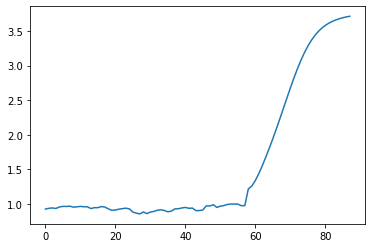

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

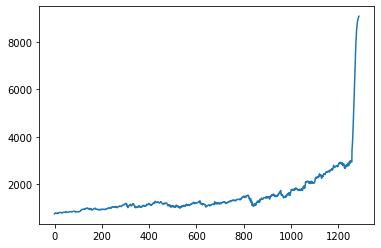

In [48]:
plt.plot(df3)